In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def polynomial_fit(x, y, degree):
    # Vandermonde matrix
    X = np.vander(x, degree + 1)
    #least squares solution for the coefficients 'a'
    X_T_X = X.T @ X
    X_T_y = X.T @ y
    coeff = np.linalg.solve(X_T_X, X_T_y)  # Solve for coefficients
    return coeff

def evaluate_poly_horner(x, coeffs):
    result = 0
    for coeff in coeffs:
        result = result * x + coeff
    return result

In [6]:
path = 'C://Users//akpat//Desktop//Agnikul//90 days plan//7-4-7 Databook//CG MI Model V3.2//train data//'
coeff_path = 'C://Users//akpat//Desktop//Agnikul//90 days plan//7-4-7 Databook//CG MI Model V3.2//MI Coefficients//MYB_LOX_'
df = pd.read_csv(path+'MYB_LOX.csv')
print(df.shape)
df.head(5)

(18, 10)


,Mass (kg),r_cg_x (mm),r_cg_y (mm),r_cg_z (mm),Ixx (kg mm2),Iyx (kg mm2),Iyy (kg mm2),Izx (kg mm2),Izy (kg mm2),Izz (kg mm2)
0,10.479,-12807.616,-1430,0,2.170933e+07,-1.919169e+08,1.719023e+09,0.0,0.0,1.740451e+09
1,26.193,-12781.378,-1430,0,5.481254e+07,-4.787330e+08,4.280000e+09,0.0,0.0,4.330000e+09
2,48.011,-12758.452,-1430,0,1.014665e+08,-8.759327e+08,7.820000e+09,0.0,0.0,7.910000e+09
3,149.454,-12695.215,-1430,0,3.242679e+08,-2.710000e+09,2.410000e+10,0.0,0.0,2.440000e+10
4,250.062,-12651.652,-1430,0,5.496223e+08,-4.520000e+09,4.000000e+10,0.0,0.0,4.060000e+10


In [8]:
coeffs_df = pd.DataFrame() ## To store Coefficient
degree = 11

## B1 ATF

### Ixx

[-1.82429584e-30  7.18087171e-26 -1.20236685e-21  1.12011609e-17
 -6.38448914e-14  2.31231107e-10 -5.37382081e-07  7.95211992e-04
 -7.31642914e-01  3.97370956e+02  2.14056484e+06 -1.58429364e+06]


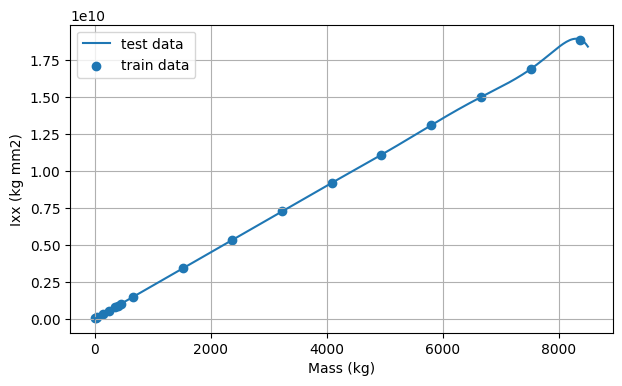

In [12]:
##Generate Coefficients
y_param = 'Ixx (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]
coeffs = polynomial_fit(x_train, y_train, degree)
coeffs_df[y_param[:3]] = coeffs
coeffs_df.to_csv(coeff_path+'Coefficient.csv')
print(coeffs)

##Visualize with graph
test_point = np.linspace(0,8500,301)
y = []
for i in range(len(test_point)):
    output = evaluate_poly_horner(test_point[i], coeffs)
    y.append(output)

plt.figure(figsize = (7, 4))
plt.plot(test_point, y, label = 'test data')
plt.scatter(df['Mass (kg)'], df[y_param], label = 'train data')
plt.xlabel('Mass (kg)')
plt.ylabel(y_param)
plt.grid()
plt.legend()

### Iyx

[-1.20660165e-30  4.81433614e-26 -8.29441506e-22  8.04453017e-18
 -4.76277767e-14  1.72267057e-10 -3.49162144e-07  2.71348743e-04
  2.21030457e-01  2.17876807e+01 -1.80592877e+07 -6.53016382e+06]


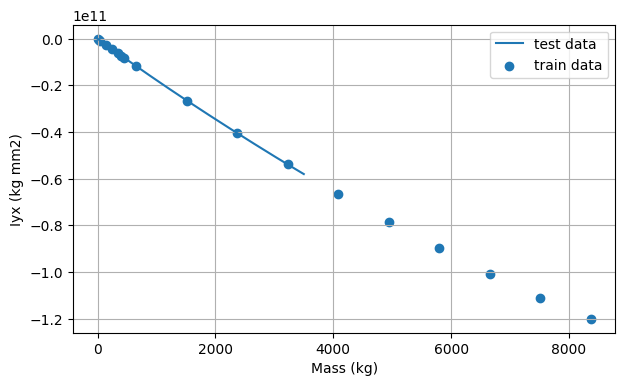

In [16]:
##Generate Coefficients
y_param = 'Iyx (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]
coeffs = polynomial_fit(x_train, y_train, degree)
coeffs_df[y_param[:3]] = coeffs
coeffs_df.to_csv(coeff_path+'Coefficient.csv')
print(coeffs)

##Visualize with graph
test_point = np.linspace(0,8500,301)
y = []
for i in range(len(test_point)):
    output = evaluate_poly_horner(test_point[i], coeffs)
    y.append(output)

plt.figure(figsize = (7, 4))
plt.plot(test_point, y, label = 'test data')
plt.scatter(df['Mass (kg)'], df[y_param], label = 'train data')
plt.xlabel('Mass (kg)')
plt.ylabel(y_param)
plt.grid()
plt.legend()

### Iyy

[ 1.85342488e-29 -8.08698550e-25  1.52597585e-20 -1.62939852e-16
  1.08042609e-12 -4.58695715e-09  1.23741249e-05 -2.02943428e-02
  1.85834165e+01 -1.61700844e+04  1.63183144e+08  1.56655813e+07]


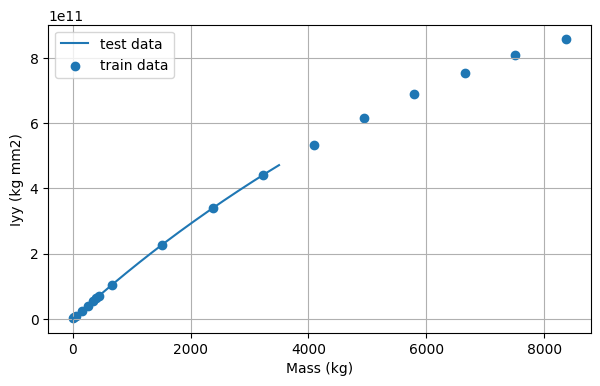

In [19]:
##Generate Coefficients
y_param = 'Iyy (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]
coeffs = polynomial_fit(x_train, y_train, degree)
coeffs_df[y_param[:3]] = coeffs
coeffs_df.to_csv(coeff_path+'Coefficient.csv')
print(coeffs)

##Visualize with graph
test_point = np.linspace(0,8500,301)
y = []
for i in range(len(test_point)):
    output = evaluate_poly_horner(test_point[i], coeffs)
    y.append(output)

plt.figure(figsize = (7, 4))
plt.plot(test_point, y, label = 'test data')
plt.scatter(df['Mass (kg)'], df[y_param], label = 'train data')
plt.xlabel('Mass (kg)')
plt.ylabel(y_param)
plt.grid()
plt.legend()

### Izx

[ 2.61470075e-41 -1.02828249e-36  1.70612226e-32 -1.54781548e-28
  8.27454312e-25 -2.57489466e-21  3.99933848e-18 -3.02533061e-16
 -8.63021537e-12  1.13350053e-08 -3.13569577e-06  9.93997240e-05]


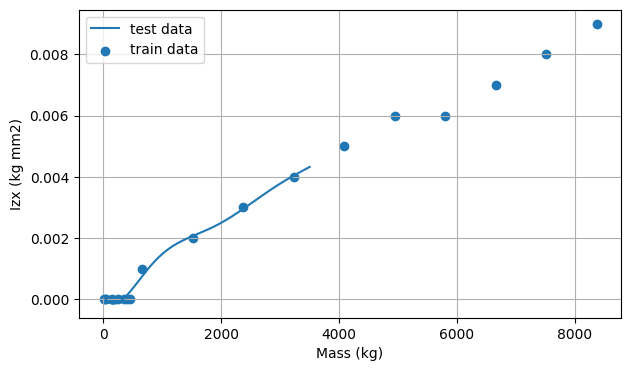

In [22]:
##Generate Coefficients
y_param = 'Izx (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]
coeffs = polynomial_fit(x_train, y_train, degree)
coeffs_df[y_param[:3]] = coeffs
coeffs_df.to_csv(coeff_path+'Coefficient.csv')
print(coeffs)

##Visualize with graph
test_point = np.linspace(0,8500,301)
y = []
for i in range(len(test_point)):
    output = evaluate_poly_horner(test_point[i], coeffs)
    y.append(output)

plt.figure(figsize = (7, 4))
plt.plot(test_point, y, label = 'test data')
plt.scatter(df['Mass (kg)'], df[y_param], label = 'train data')
plt.xlabel('Mass (kg)')
plt.ylabel(y_param)
plt.grid()
plt.legend()

### Izy

[-3.66584305e-41  1.51955508e-36 -2.68894667e-32  2.65056648e-28
 -1.59265048e-24  6.00006582e-21 -1.40531180e-17  1.96336949e-14
 -1.50374578e-11  5.40969843e-09 -7.12888598e-07  1.46691097e-05]


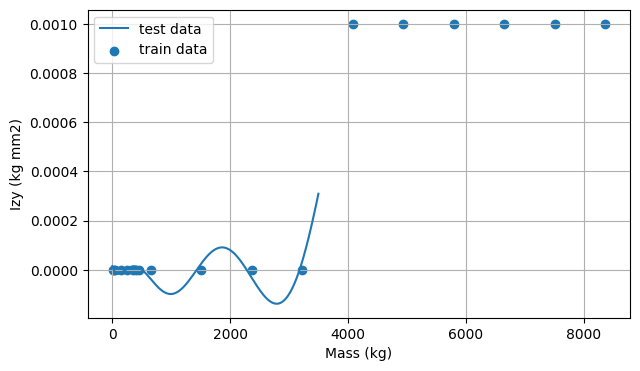

In [25]:
##Generate Coefficients
y_param = 'Izy (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]
coeffs = polynomial_fit(x_train, y_train, degree)
coeffs_df[y_param[:3]] = coeffs
coeffs_df.to_csv(coeff_path+'Coefficient.csv')
print(coeffs)

##Visualize with graph
test_point = np.linspace(0,8500,301)
y = []
for i in range(len(test_point)):
    output = evaluate_poly_horner(test_point[i], coeffs)
    y.append(output)

plt.figure(figsize = (7, 4))
plt.plot(test_point, y, label = 'test data')
plt.scatter(df['Mass (kg)'], df[y_param], label = 'train data')
plt.xlabel('Mass (kg)')
plt.ylabel(y_param)
plt.grid()
plt.legend()

### Izz

[ 5.50123596e-29 -2.33343827e-24  4.25955832e-20 -4.37882949e-16
  2.78497420e-12 -1.13344193e-08  2.95034143e-05 -4.76774467e-02
  4.49175368e+01 -2.97811024e+04  1.67912177e+08 -5.97765489e+07]


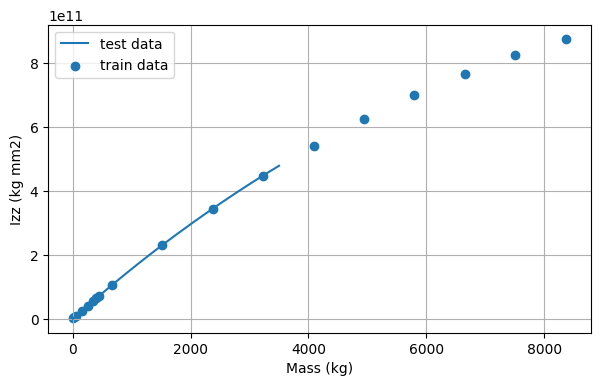

In [28]:
##Generate Coefficients
y_param = 'Izz (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]
coeffs = polynomial_fit(x_train, y_train, degree)
coeffs_df[y_param[:3]] = coeffs
coeffs_df.to_csv(coeff_path+'Coefficient.csv')
print(coeffs)

##Visualize with graph
test_point = np.linspace(0,8500,301)
y = []
for i in range(len(test_point)):
    output = evaluate_poly_horner(test_point[i], coeffs)
    y.append(output)

plt.figure(figsize = (7, 4))
plt.plot(test_point, y, label = 'test data')
plt.scatter(df['Mass (kg)'], df[y_param], label = 'train data')
plt.xlabel('Mass (kg)')
plt.ylabel(y_param)
plt.grid()
plt.legend()

## Finding best degree

In [33]:
y_param = 'Ixx (kg mm2)'
x_train = df['Mass (kg)']
y_train = df[y_param]

coeffs_list = []
degrees = np.arange(2, 18, 1)
for degree in degrees:
    coeffs = polynomial_fit(x_train, y_train, degree)
    coeffs_list.append(coeffs)
len(coeffs_list)

16

Text(0, 0.5, 'Error')

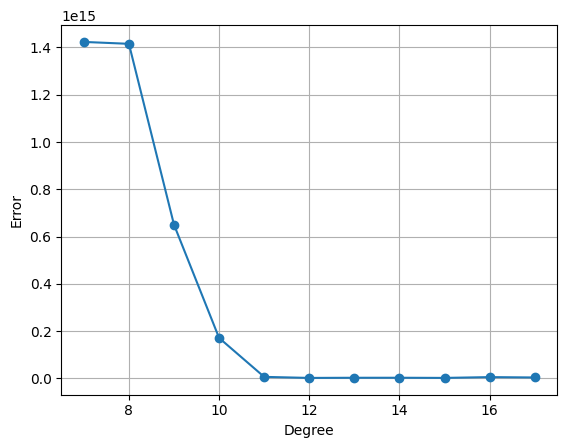

In [35]:
x_val = np.array(df['Mass (kg)'])
y_val = np.array(df[y_param])
df_test = pd.DataFrame()
df_test['mass'] = x_val
error = []
for i in range(len(coeffs_list)):
    coeff = coeffs_list[i]
    y_est = evaluate_poly_horner(x_val, coeff)
    error.append(np.sum((y_val-y_est)**2))
    df_test[f'deg_{degrees[i]}'] = y_est

plt.plot(degrees[5:], error[5:], marker='o')
plt.grid()
plt.xlabel('Degree')
plt.ylabel('Error')